### **Modeling & Simulation Project**

In [226]:
import sys
!{sys.executable} -m pip install simpy

Defaulting to user installation because normal site-packages is not writeable


In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load dataframe
df = pd.read_csv('../data/timeslots.csv')
df.head()

,timeslot_id,day,start_time,end_time
0,1,Wednesday,15:00,19:00
1,2,Friday,13:00,12:00
2,3,Thursday,13:00,17:00
3,4,Monday,16:00,15:00
4,5,Friday,10:00,11:00


In [228]:
# show columns
df.columns

Index(['timeslot_id', 'day', 'start_time', 'end_time'], dtype='object')

In [229]:
# inspect data types
df.dtypes

timeslot_id     int64
day            object
start_time     object
end_time       object
dtype: object

In [230]:
# cleaning the data into time values 
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['start_min'] = df['start_time'].dt.hour * 60 + df['start_time'].dt.minute
df['end_min'] = df['end_time'].dt.hour * 60 + df['end_time'].dt.minute

df['duration_min'] = df['end_min'] - df['start_min']

df['start_time_fmt'] = df['start_time'].dt.strftime("%H:%M")
df['end_time_fmt'] = df['end_time'].dt.strftime("%H:%M")

C:\Users\LEI\AppData\Local\Temp\ipykernel_8532\1337533246.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_time'] = pd.to_datetime(df['start_time'])
C:\Users\LEI\AppData\Local\Temp\ipykernel_8532\1337533246.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['end_time'] = pd.to_datetime(df['end_time'])


In [231]:
# identifying columns that has invalid time ranges
invalid_cols = df[df['end_min'] <= df['start_min']]

In [232]:
# dropping invalid cols
df = df[df['end_min'] > df['start_min']]

#columns that are lesser >= 30 mins and <= 4 hrs
df = df[(df['duration_min'] >= 30) & (df['duration_min'] <= 240)]
df

,timeslot_id,day,start_time,end_time,start_min,end_min,duration_min,start_time_fmt,end_time_fmt
0,1,Wednesday,2026-01-17 15:00:00,2026-01-17 19:00:00,900,1140,240,15:00,19:00
2,3,Thursday,2026-01-17 13:00:00,2026-01-17 17:00:00,780,1020,240,13:00,17:00
4,5,Friday,2026-01-17 10:00:00,2026-01-17 11:00:00,600,660,60,10:00,11:00
5,6,Tuesday,2026-01-17 15:00:00,2026-01-17 17:00:00,900,1020,120,15:00,17:00
7,8,Thursday,2026-01-17 10:00:00,2026-01-17 13:00:00,600,780,180,10:00,13:00
8,9,Friday,2026-01-17 11:00:00,2026-01-17 15:00:00,660,900,240,11:00,15:00
10,11,Monday,2026-01-17 11:00:00,2026-01-17 15:00:00,660,900,240,11:00,15:00
13,14,Monday,2026-01-17 15:00:00,2026-01-17 18:00:00,900,1080,180,15:00,18:00
14,15,Friday,2026-01-17 08:00:00,2026-01-17 12:00:00,480,720,240,08:00,12:00
17,18,Friday,2026-01-17 08:00:00,2026-01-17 11:00:00,480,660,180,08:00,11:00


In [233]:
# turning days into numerical values
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df['day'] = df['day'].map(day_mapping)
df

,timeslot_id,day,start_time,end_time,start_min,end_min,duration_min,start_time_fmt,end_time_fmt
0,1,2,2026-01-17 15:00:00,2026-01-17 19:00:00,900,1140,240,15:00,19:00
2,3,3,2026-01-17 13:00:00,2026-01-17 17:00:00,780,1020,240,13:00,17:00
4,5,4,2026-01-17 10:00:00,2026-01-17 11:00:00,600,660,60,10:00,11:00
5,6,1,2026-01-17 15:00:00,2026-01-17 17:00:00,900,1020,120,15:00,17:00
7,8,3,2026-01-17 10:00:00,2026-01-17 13:00:00,600,780,180,10:00,13:00
8,9,4,2026-01-17 11:00:00,2026-01-17 15:00:00,660,900,240,11:00,15:00
10,11,0,2026-01-17 11:00:00,2026-01-17 15:00:00,660,900,240,11:00,15:00
13,14,0,2026-01-17 15:00:00,2026-01-17 18:00:00,900,1080,180,15:00,18:00
14,15,4,2026-01-17 08:00:00,2026-01-17 12:00:00,480,720,240,08:00,12:00
17,18,4,2026-01-17 08:00:00,2026-01-17 11:00:00,480,660,180,08:00,11:00


### **Discrete Event Simulation using SimPy**

In [234]:
import simpy

NUM_ROOMS = 5
MINUTES_PER_DAY = 1440

df = df.copy()
df['arrival_time'] = df['day'] * MINUTES_PER_DAY + df['start_min']
df['duration'] = df['end_min'] - df['start_min']

results = []

# main simulation function
def classroom_reservation(env, rooms, row):
    arrival = row['arrival_time']
    duration = row['duration']


    yield env.timeout(arrival - env.now)

    request_time = env.now

    with rooms.request() as req:
        yield req

        start_time = env.now
        waiting_time = start_time - request_time


        yield env.timeout(duration)

        end_time = env.now

        results.append({
            'timeslot_id': row['timeslot_id'],
            'arrival_time': arrival,
            'start_time': start_time,
            'end_time': end_time,
            'waiting_time': waiting_time,
            'occupied_time': duration,
            'status': 'success'
        })


env = simpy.Environment()
rooms = simpy.Resource(env, capacity=NUM_ROOMS)

### **Start Processing (Handling Multiple Requests per Day)**

In [235]:
for _, row in df.sort_values('arrival_time').iterrows():
    env.process(classroom_reservation(env, rooms, row))

# run sim
SIM_TIME = df['arrival_time'].max() + df['duration'].max()
env.run(until=SIM_TIME)

# results into dataframe
results_df = pd.DataFrame(results)

In [236]:
results_df

,timeslot_id,arrival_time,start_time,end_time,waiting_time,occupied_time,status
0,48,540,540,780,0,240,success
1,11,660,660,900,0,240,success
2,64,840,840,1020,0,180,success
3,66,960,960,1020,0,60,success
4,14,900,900,1080,0,180,success
5,6,2340,2340,2460,0,120,success
6,22,2340,2340,2580,0,240,success
7,84,2400,2400,2580,0,180,success
8,98,3360,3360,3540,0,180,success
9,32,3540,3540,3600,0,60,success


In [237]:
max_rooms_needed = utilization.max()
print(f"The maximum number of rooms used at once was: {max_rooms_needed}")

The maximum number of rooms used at once was: 4.0


### **DATA ANALYSIS AND VISUALIZATION**

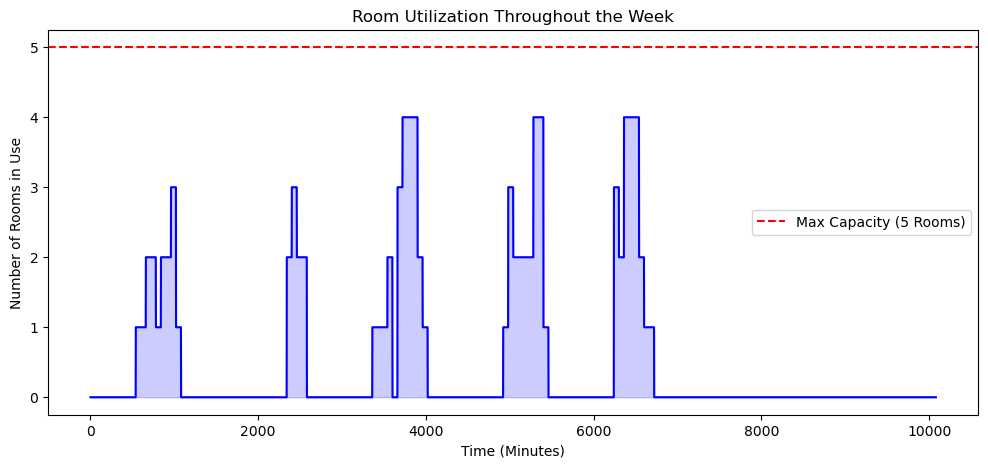

In [238]:
total_minutes = 7 * 1440
utilization = np.zeros(total_minutes)

for _, row in results_df.iterrows():
    start = int(row['arrival_time'])
    end = int(row['arrival_time'] + row['occupied_time'])
    utilization[start:end] += 1

plt.figure(figsize=(12, 5))
plt.plot(utilization, color='blue')
plt.axhline(y=5, color='red', linestyle='--', label='Max Capacity (5 Rooms)')
plt.fill_between(range(total_minutes), utilization, color='blue', alpha=0.2)
plt.title('Room Utilization Throughout the Week')
plt.xlabel('Time (Minutes)')
plt.ylabel('Number of Rooms in Use')
plt.legend()
plt.show()